# <center>APLU Western Cluster Curricular Analytics Study</center>

In this notebook we analyze the curricula and degree plans associated with a set of programs at universities in the APLU Western Cluster.  This cluster of schools is one of the "transformation clusters" formed as a part of APLU's 
[Powered by Publics Initiative](https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics) <cite data-cite="APLU:18">(APLU, 2019)</cite>. The schools in the Western Cluster include:

- Colorado State University
- Langston University
- Montana State University
- New Mexico State University
- North Dakota State University
- Oklahoma State University
- South Dakota State University
- University of Idaho
- University of Nevada-Reno
- University of Wyoming
- Utah State University

The analyses in this notebook makes use of the [Curricular Analytics toolbox](https://github.com/CurricularAnalytics/CurricularAnalytics.jl) 
built using the Julia programming language  and available as open source software (<cite data-cite="he:19">Heileman, et. al., 2019</cite>). As a starting 
point, you may find it useful to read the [toolbox documenation](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/), as well as 
the <cite data-cite="he:18">Heileman, et. al., (2018)</cite> paper listed in the [References](#References) 
section below.

If you are interested in joining the community of scholars working to apply curricular analytics, please 
feel free to make [suggestions](need to add this link) about future development or [contribute](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/contributing.html) to the 
CurricularAnalytics.jl project.


In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [16]:
########## use this to run CA locally
using Pkg
if split(pwd(),Base.Filesystem.path_separator)[end] != "CurricularAnalytics.jl"
    cd("../../CurricularAnalytics.jl/")
end
pkg"activate ."
cd("../CA-Notebooks/Western Cluster-APLU")
############
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

## Create the Data Structures 
First, create an array called `schools` containing the names of the schools in the cluster, given by the subdirectory names in the ./cluster directory.

In [27]:
schools = Array{String,1}()
for path in glob("*", "./cluster")
  push!(schools, replace(path, "./cluster/" => ""))
end

The degree plans for the selected programs at these schools are stored as CSV files in the `./cluster` directory associated with this notebook.  Next, we will read each of these degree plans, and store them as `DegreePlan` objects in a `school_plans` dictionary.

In [28]:
schools_plans = Dict{String, Dict{String, DegreePlan}}()
for school in schools
  plans = Dict{String, DegreePlan}()
  programs = glob("*", "./cluster/$(school)")
  for program in programs
    program_name = replace(split("$(program)", "/")[end], ".csv" => "")
    plans[program_name] = read_csv(program)
    complexity(plans[program_name].curriculum)  # compute the curricular complexity of the degree plan
  end
  schools_plans[school] = plans
end

You can now access and visualize the degree plan associate witha a particular program at a particular school as follows:

In [29]:
dp = schools_plans["colorado-state"]["music-education"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Music Education\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"CO 150\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":22.0,\"centrality\":0,\"blocking factor\":14,\"delay factor\":8.0},\"nameSub\":\"MU 117\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":7.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":4.0},\"nameSub\":\"MU 127\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":4.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":2.0},\"nameSub\":\"MU 131\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"MU 150\",\"id\":5,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 251\",\"id\":6,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 272\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 286\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENSEMBLE\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"complexity\":19.0,\"centrality\":48,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"MU 118\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":11,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"complexity\":6.0,\"centrality\":4,\"blocking factor\":2,\"delay factor\":4.0},\"nameSub\":\"MU 128\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"MU 151A\",\"id\":12,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 252B\",\"id\":13,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 272\",\"id\":14,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENSEMBLE\",\"id\":15,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AUCC 3B\",\"id\":16,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":

## Curricular Analytics
First we will analyze the structural properties of the various curricula provided by the programs at the cluster schools.  This will involve analyzing the structural properties of a single curriculum.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).

Next we will analyze the complexities associated with the curricula in each of four disciplines across all schools in the cluster, namely animal science, mechanical engineering, music education, and psychology.  That is, we will look at the intra-discipline curricular complexity for each of these disciplines.  Finally, we will compare the inter-discipline curricular complexity statistics of the schools in the cluster.

### Analysis of a single curriclum 
The `basic_metrics()` function can be used to output a set of basic metrics associatd with a curriculum. As an example, here are the basic curricular metrics associated with the Music Education program at Colorado State Univeristy:

In [30]:
dp = schools_plans["colorado-state"]["music-education"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Music Education
  credit hours = 120
  number of courses = 62
  Blocking Factor --
    entire curriculum = 96
    max. value = 14, for course(s): MU 117
  Centrality --
    entire curriculum = 647
    max. value = 138, for course(s): EDUC 450
  Delay Factor --
    entire curriculum = 199.0
    max. value = 8.0, for course(s): MU 117, MU 118, EDUC 275, MU 217, EDUC 340, EDUC 350, EDUC 386, EDUC 475, EDUC 450, EDUC 477, EDUC 485A, EDUC 485B, EDUC 493A
  Complexity --
    entire curriculum = 295.0
    max. value = 22.0, for course(s): MU 117
  Longest Path(s) --
    length = 8, number of paths = 2
    path(s):
    path 1 = EDUC 340 -> EDUC 475 -> EDUC 386 -> EDUC 350 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A
    path 2 = MU 117 -> MU 118 -> MU 217 -> EDUC 477 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A



Here are the basic curricular metrics associated with the Mechanical Engineering program at Colorado State Univeristy:

In [31]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Mechanical Engineering
  credit hours = 129
  number of courses = 39
  Blocking Factor --
    entire curriculum = 143
    max. value = 26, for course(s): MATH 160
  Centrality --
    entire curriculum = 680
    max. value = 81, for course(s): PH 141
  Delay Factor --
    entire curriculum = 176.0
    max. value = 7.0, for course(s): MATH 160, MATH 161, MATH 261, MATH 340, MECH 342, MECH 338, MECH 486B, MECH 498B
  Complexity --
    entire curriculum = 319.0
    max. value = 33.0, for course(s): MATH 160
  Longest Path(s) --
    length = 7, number of paths = 4
    path(s):
    path 1 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 486B
    path 2 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> MECH 486B
    path 3 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 498B
    path 4 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> MECH 498B



### Analysis of curricula across all cluster schools
Next, a data structure is created that groups together the curricula of similar programs across all of the Western Cluster schools. The four disciplinary groupings in this case are all programs with names containing: "animal," "mechanical," "music," and "psychology."

The `basic_statistics()` function is then called on each collection of curricula, in order to compute the statistical features of the curricular complexities within each discipline.  Finally, a historgram of the curricular complexities within each discipline is provided using the `metric_histogram()` function.

****** Music Education Programs ******

 Metric -- complexity
  Number of curricula = 20
  Mean = 139.25
  STD = 13.248702766686254
  Max. = 306.0
  Min. = 71.0


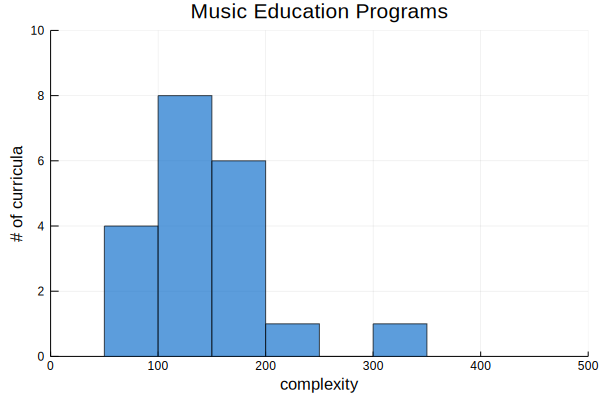

****** Animal Science Programs ******

 Metric -- complexity
  Number of curricula = 11
  Mean = 319.3636363636364
  STD = 7.126631780928955
  Max. = 496.0
  Min. = 140.0


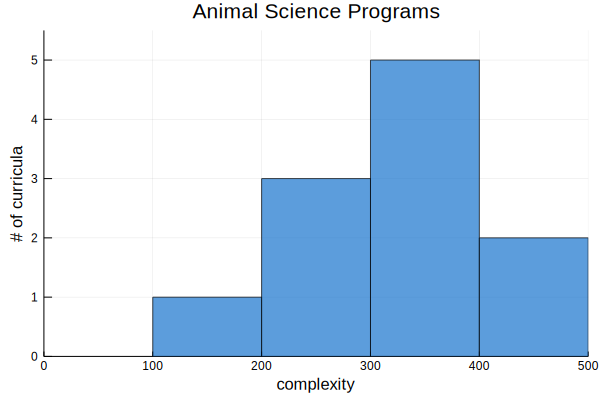

****** Mechanical Engineering Programs ******

 Metric -- complexity
  Number of curricula = 14
  Mean = 225.0
  STD = 21.38089935299395
  Max. = 295.0
  Min. = 145.0


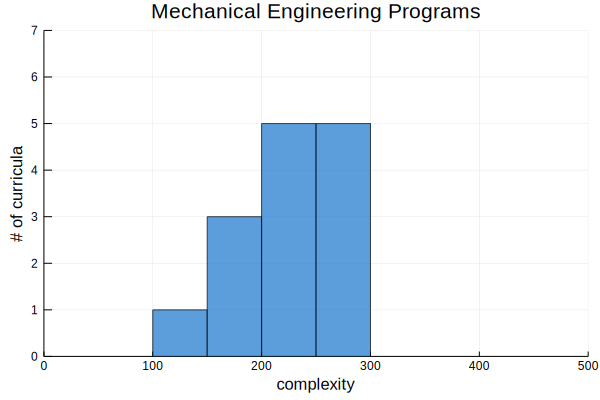

****** Psychology Programs ******

 Metric -- complexity
  Number of curricula = 13
  Mean = 77.61538461538461
  STD = 2.112127670242218
  Max. = 113.0
  Min. = 40.0


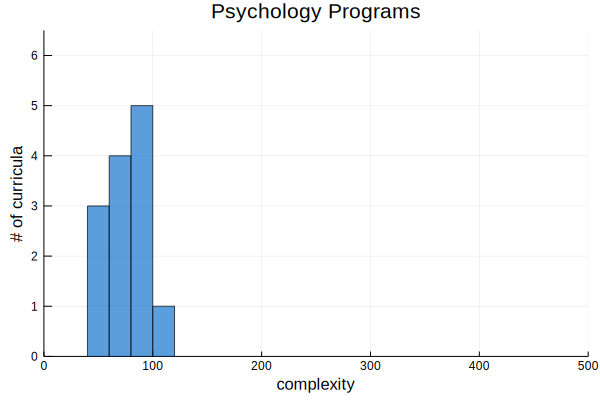

In [32]:
# Find all programs with the keywords listed below in their names, and store them in corresponding arrays.
program_keyword = ["animal", "mechanical", "music", "psychology"]
program_types = Dict{String, Array{Curriculum,1}}("animal-science" => [], "mechanical-engineering" => [], "music-education" => [], "psychology" => [])
metric = "complexity"
for (i, (k, programs)) in enumerate(program_types)
    for school in schools
      path = "./cluster/$(school)"
      for file in readdir(path)
        if (occursin(program_keyword[i], file) && occursin(".csv", file))
          program_name = replace(file, ".csv" => "")
          push!(programs, schools_plans[school][program_name].curriculum);
        end
      end
    end
    println("****** $(replace(titlecase(k), "-" => " ")) Programs ******")
    stats = basic_statistics(programs, "complexity")
    println(String(take!(stats))); flush(stdout)  
    display(metric_histogram(programs, metric, title="$(replace(titlecase(k), "-" => " ")) Programs", xlabel="$(metric)", ylabel="# of curricula", xlim=(0,500)))
end

In order to get a better sense of the curricular complexity variations between disciplines, the `metric_boxplot()` function can be used to simultaneously display (on the same scale) the curricular complexity variations in all four disciplines.   

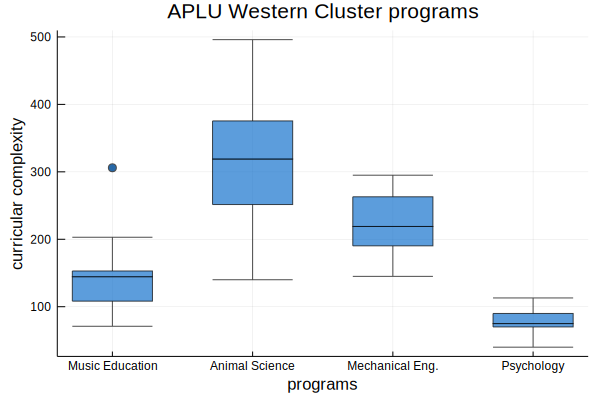

In [33]:
metric_boxplot(["Music Education" "Animal Science" "Mechanical Eng." "Psychology"], [program_types["music-education"], 
      program_types["animal-science"], program_types["mechanical-engineering"], program_types["psychology"]], 
      "complexity", title="APLU Western Cluster programs", xlabel="programs", ylabel="curricular complexity")

The smallest mean and variance occur in the psychology programs, where the average curricular complexity is 77 units, and standard deveiation is only 2.11.  All but one of the psychology programs have a curricular complexity of less than 100 units.  The largest mean and variance occur in the animal science programs.  The average complexity for animcal science programs is 319 units, with a variance of 7.13 units.

## Degree Plan Analytics

### Analysis of a single degree plan 
Music Education at CSU:

In [34]:
metrics = basic_metrics(dp)
println(String(take!(metrics)))


Curriculum: Mechanical Engineering
Degree Plan: 4-Year Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 20, in term 4
  min. credits in a term = 13, in term 6
  avg. credits per term = 16.125, with std. dev. = 2.0879116360612584



## References
<a id='References'></a>

APLU, Powered by Publics website (accessed August 15, 2019). https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.